In [2]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import pandas as pd
import csv
from os.path import splitext
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

Using TensorFlow backend.


# CNN with 1 Convolutional Layer


In [3]:
# Load training and test data into dataframes
PATH = os.getcwd()
from keras.utils import to_categorical
df = pd.read_csv(PATH + '\\CNN-image-dataset.csv');

df = df.iloc[np.random.permutation(len(df))]
data_train = df[0:5000]
data_test = df[5001:]


# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 3:])
y = to_categorical(np.array(data_train.iloc[:, 1]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 3:])
y_test = to_categorical(np.array(data_test.iloc[:, 1]))

In [4]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [5]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_val.shape)

(4000, 28, 28, 1)
(5000, 28, 28, 1)
(1000, 28, 28, 1)
(1000, 3)


In [16]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.7))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(3, activation='softmax'))

In [17]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, nesterov=True),
              metrics=['accuracy'])

In [18]:
import time
start_time = time.time()
history1 = cnn1.fit(X_train, y_train, batch_size=256 , 
                    nb_epoch=50, verbose=1, 
                    validation_data=(X_val, y_val))
print("--- %s seconds ---" % (time.time() - start_time))
cnn4_time = time.time() - start_time

C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 4s 896us/step - loss: 1.0458 - acc: 0.7480 - val_loss: 0.9805 - val_acc: 0.7400
Epoch 2/50
4000/4000 [==============================] - 2s 581us/step - loss: 0.9028 - acc: 0.7655 - val_loss: 0.8221 - val_acc: 0.7400
Epoch 3/50
4000/4000 [==============================] - 2s 591us/step - loss: 0.7524 - acc: 0.7655 - val_loss: 0.7364 - val_acc: 0.7400
Epoch 4/50
4000/4000 [==============================] - 2s 584us/step - loss: 0.6949 - acc: 0.7655 - val_loss: 0.7256 - val_acc: 0.7400
Epoch 5/50
4000/4000 [==============================] - 2s 579us/step - loss: 0.6836 - acc: 0.7655 - val_loss: 0.7239 - val_acc: 0.7400
Epoch 6/50
4000/4000 [==============================] - 2s 587us/step - loss: 0.6793 - acc: 0.7655 - val_loss: 0.7222 - val_acc: 0.7400
Epoch 7/50
4000/4000 [==============================] - 2s 594us/step - loss: 0.6786 - acc: 0.7655 - val_loss: 0.7206 - val_acc: 0.7400


In [19]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.6640840503692627
Test accuracy: 0.769


50


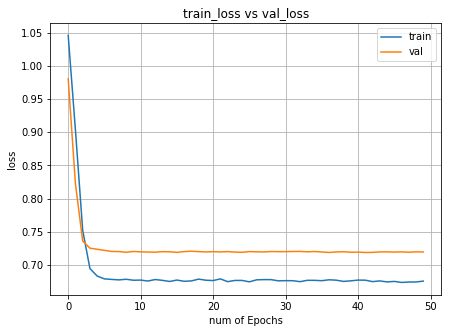

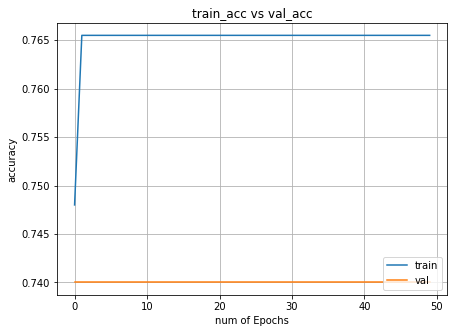

In [20]:
# visualizing losses and accuracy
train_loss=history1.history['loss']
val_loss=history1.history['val_loss']
train_acc=history1.history['acc']
val_acc=history1.history['val_acc']
xc=range(50)
print(len(train_loss))
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)

In [10]:
# get the predictions for the test data
predicted_classes = cnn1.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 1].values
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [11]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.97      0.95      0.96       882
     Class 1       0.95      1.00      0.97       862
     Class 2       0.95      0.89      0.92       307

   micro avg       0.96      0.96      0.96      2051
   macro avg       0.96      0.94      0.95      2051
weighted avg       0.96      0.96      0.96      2051



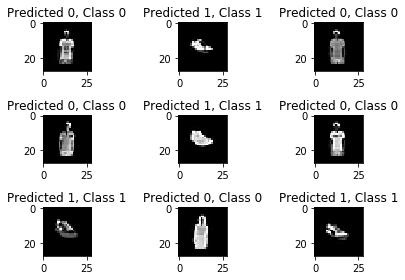

In [12]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

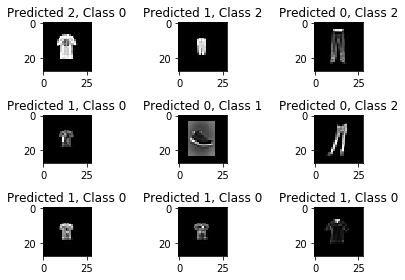

In [13]:

for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

In [14]:
# get the predictions for the test data
predicted_classes = cnn1.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 1].values
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [15]:
len(correct)

1964

In [16]:
len(incorrect)

87

2051
2051


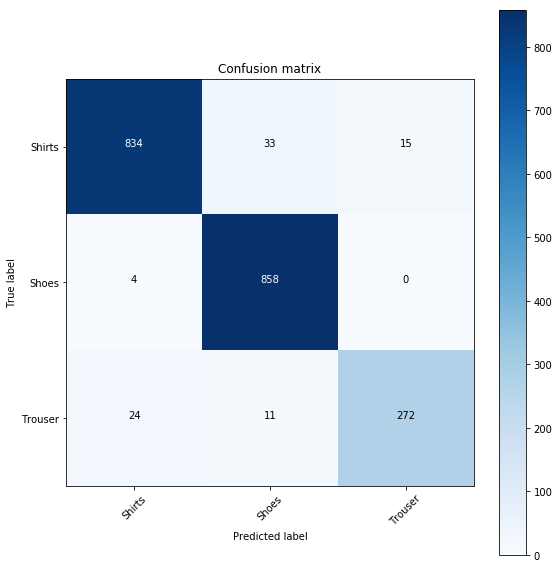

In [17]:
print(len(y_test))
print(len(predicted_classes))
classes = {0: 'Shirts', 
           1: 'Shoes', 
           2: 'Trouser'}

class_names = ['Shirts','Shoes','Trouser']
import itertools
from sklearn.metrics import confusion_matrix, classification_report
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
cnf_matrix = confusion_matrix(data_test.iloc[:, 1], predicted_classes)
plot_confusion_matrix(cnf_matrix, classes = class_names)

In [18]:
pred_accuracy = (len(correct)/5000) * 100

print("--- %s is the Prediction Accuracy ---" % (pred_accuracy))

--- 39.28 is the Prediction Accuracy ---


In [19]:
correct

array([   0,    1,    2, ..., 2047, 2049, 2050], dtype=int64)

In [20]:
pred_accuracy

39.28

In [21]:
cnn4_time

27.14238691329956

In [22]:
# serialize model to JSON
model_json = cnn1.to_json()
with open("cnn1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn1.save_weights("cnn1.h5")
print("Saved model to disk")

Saved model to disk
